In [1]:
import cv2
from matplotlib import pyplot as plt
import glob
import numpy as np
from math import floor
%matplotlib notebook

In [2]:
# pct 3 (V >= 0.4) & (0.2 < S < 0.6) & (0 < H < 25 | 335 < H <= 360)
# tradus fct 1 = 0.4 * 255
# tradus fct 1 = 0.2 * 255
# tradus fct 1 = 0.6 * 255
# tradus fct 1 = 25 * 0.5
# tradus fct 1 = 335 * 0.2
# tradus fct 1 = 360 * 0.2



In [3]:
def imread(path):
    return cv2.imread(path)[:,:,::-1]

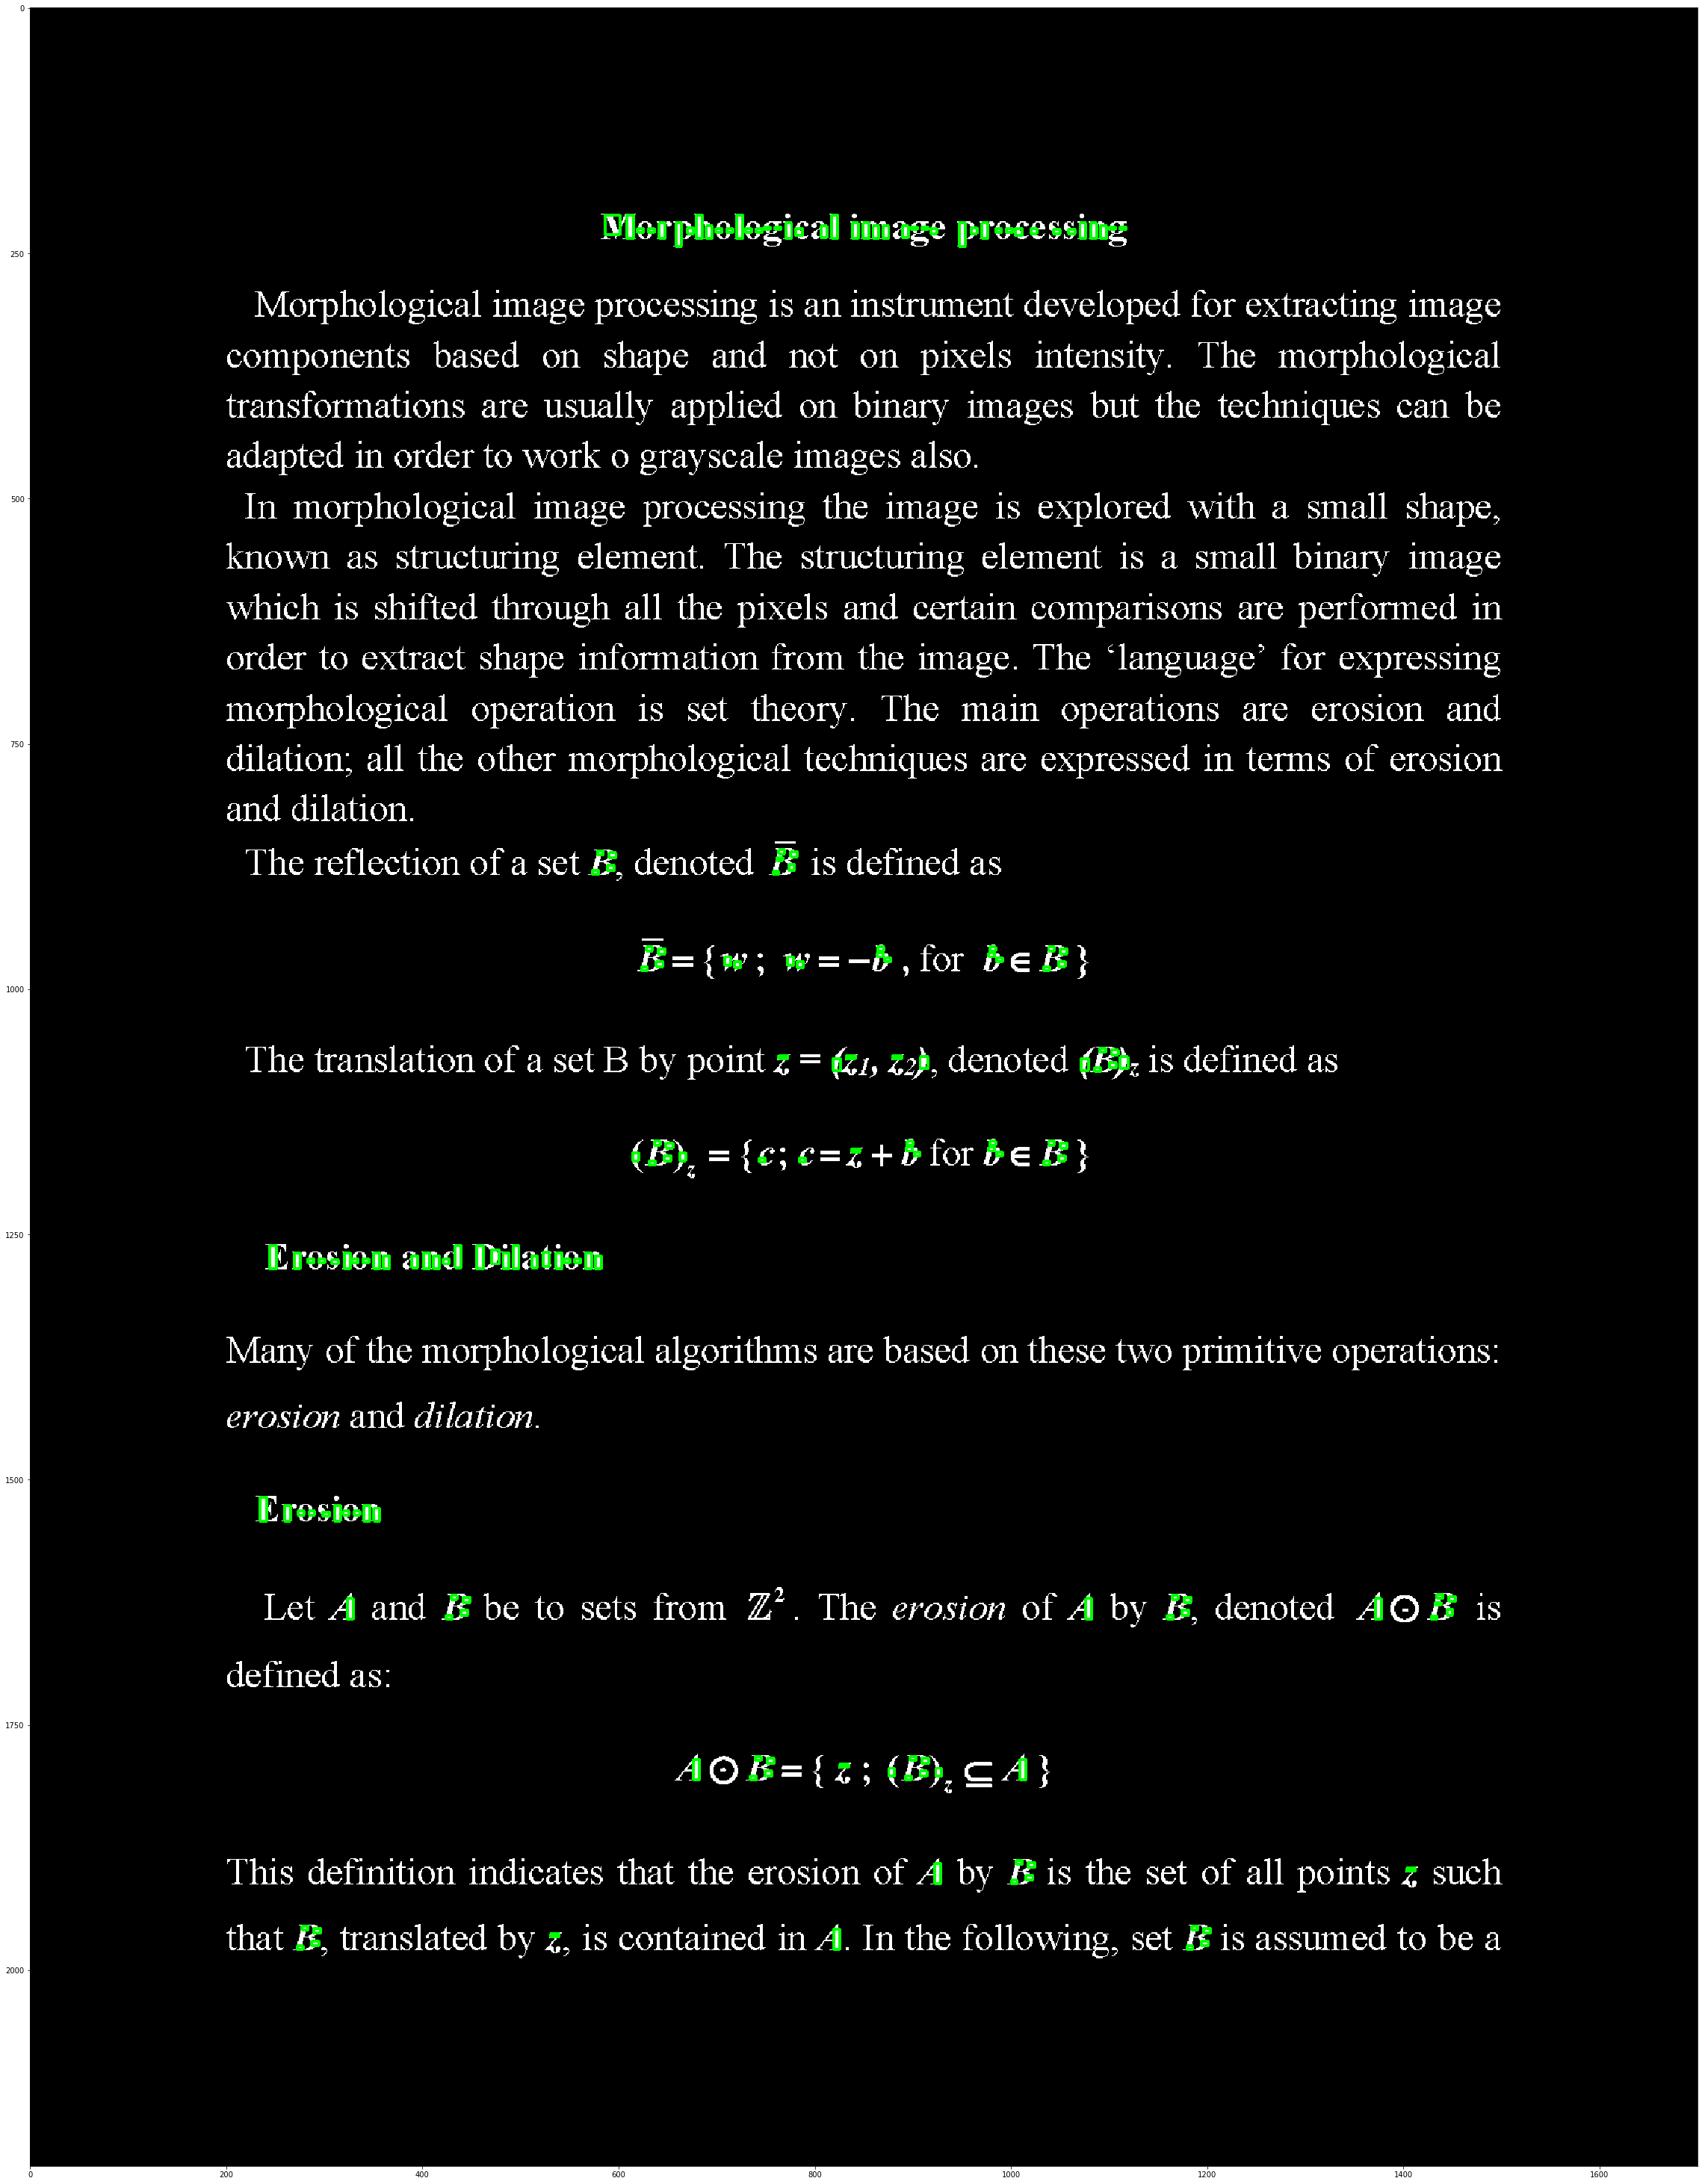

In [43]:
img_path = glob.glob('images\Lab_3_DIP.tiff')[0]
img = imread(img_path)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
# gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
# thresh = cv2.dilate(thresh,None,iterations = 3)
# thresh = cv2.erode(thresh,None,iterations = 2)

# Find the contours


kernel = np.ones((5,5), np.uint8)
erodation = cv2.erode(thresh, kernel, iterations = 1)

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 3))
dilation = cv2.dilate(erodation, rect_kernel, iterations = 1)


contours,hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)
fig=plt.figure(figsize=(40, 60))
# Finally show the image
# plt.imshow(img)
plt.imshow(thresh_color)


In [10]:
contours[0]

array([[[ 830, 1976]],

       [[ 830, 1977]],

       [[ 830, 1978]],

       [[ 830, 1979]],

       [[ 830, 1980]],

       [[ 831, 1980]],

       [[ 832, 1980]],

       [[ 833, 1980]],

       [[ 834, 1980]],

       [[ 835, 1980]],

       [[ 836, 1980]],

       [[ 837, 1980]],

       [[ 837, 1979]],

       [[ 837, 1978]],

       [[ 837, 1977]],

       [[ 837, 1976]],

       [[ 836, 1976]],

       [[ 835, 1976]],

       [[ 834, 1976]],

       [[ 833, 1976]],

       [[ 832, 1976]],

       [[ 831, 1976]]], dtype=int32)

C:\Users\iustin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


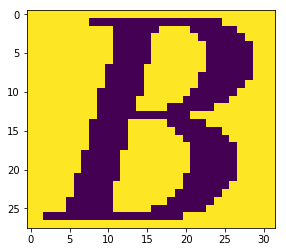

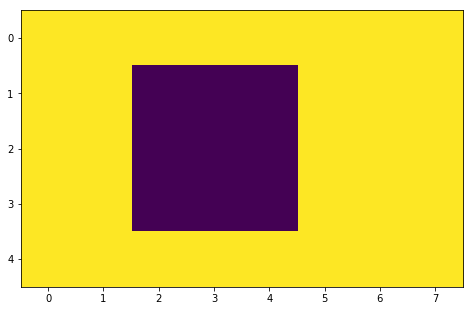

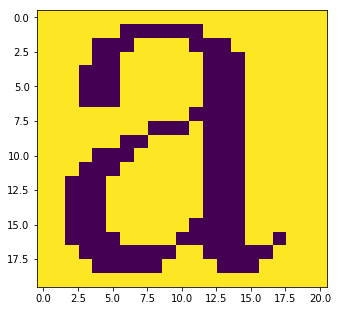

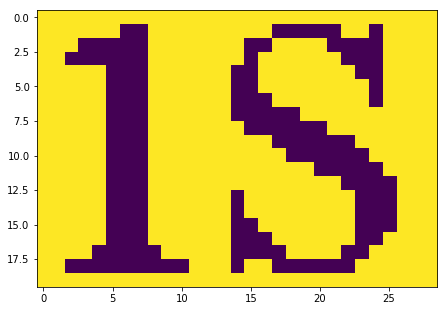

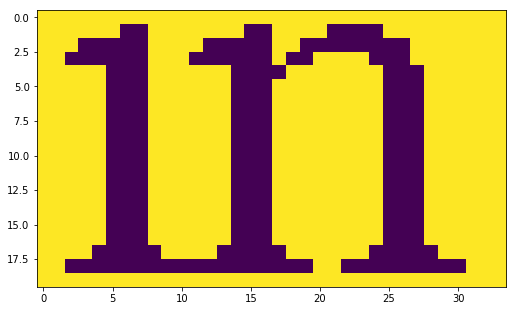

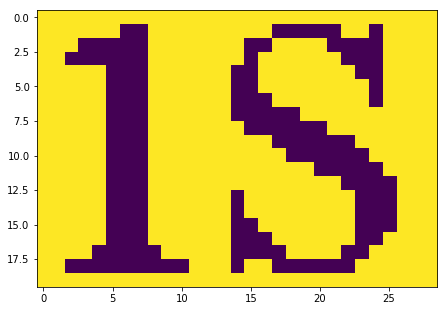

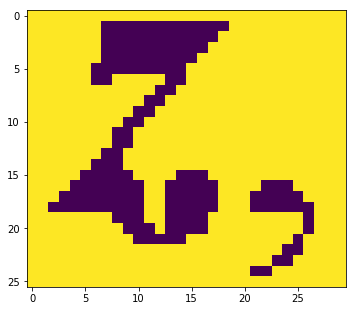

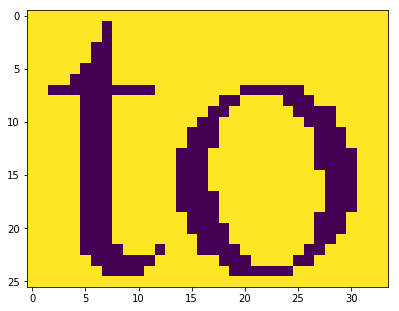

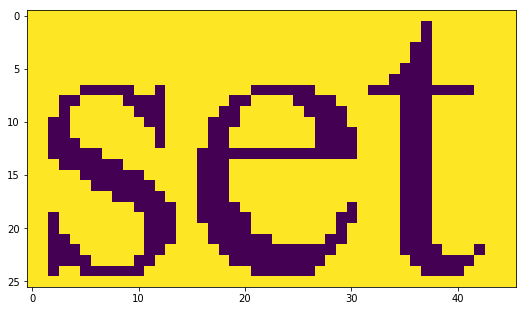

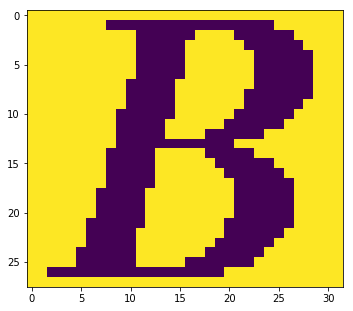

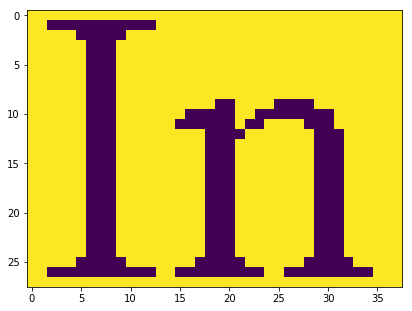

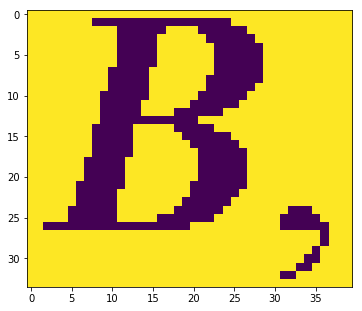

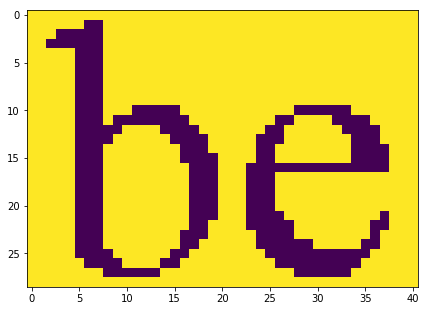

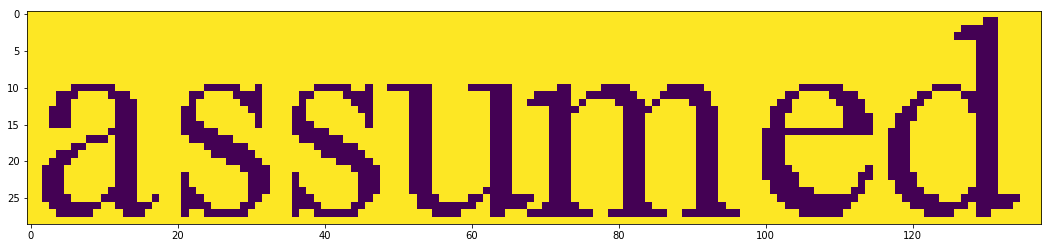

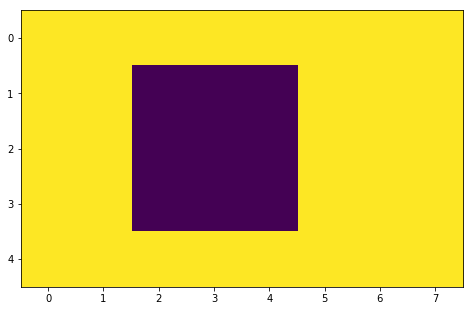

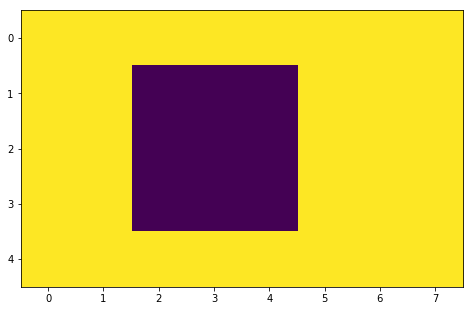

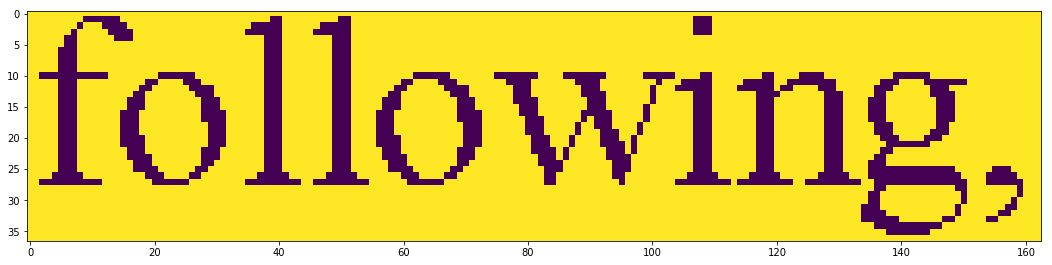

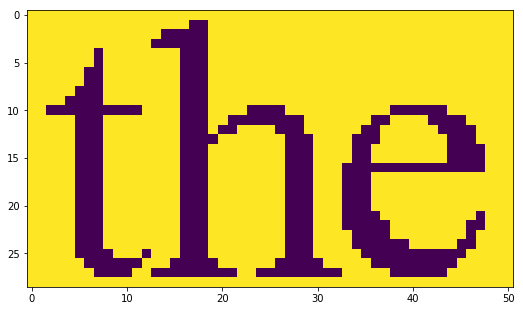

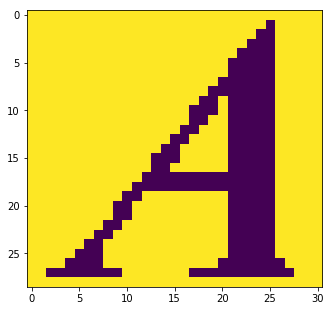

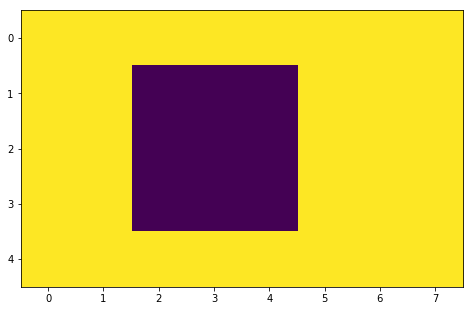

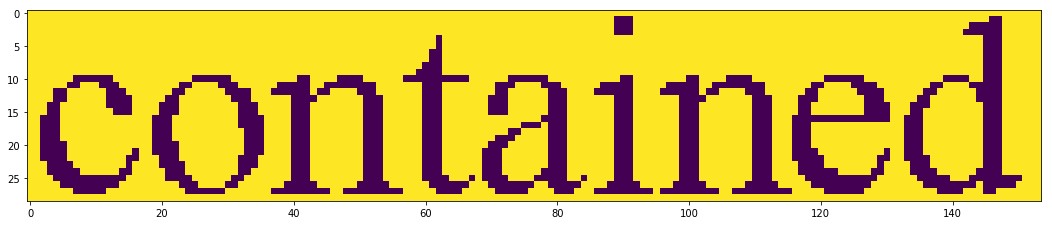

In [37]:
x,y,w,h = cv2.boundingRect(contours[8])
word = gray[y:y+h, x:x+w]
plt.imshow(word)


for i, cnt in enumerate(contours[:20]):
    fig=plt.figure(figsize=(40, 60))
    fig.add_subplot(10, 2, 1)
    
    x,y,w,h = cv2.boundingRect(cnt)
    word = gray[y:y+h, x:x+w]
    plt.imshow(word)
plt.show()


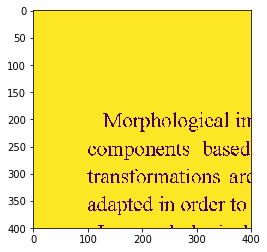

In [28]:
word = gray[x:x+w, y:y+h]
plt.imshow(gray[100:500, 100:500])

In [27]:
gray[100:200, 100:200]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [22]:
y

1976

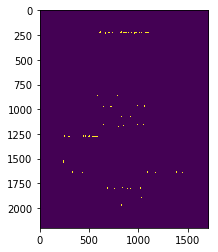

In [44]:
plt.imshow(dilation)